# Descriptive Statistics and Data Exploration of Titanic Dataset

## Import Libraries and Datasets

In [1]:
#Data Analysis
import numpy as np
import pandas as pd
#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
train = pd.read_csv("train.csv")

## Data Preparation and Quality Assessment

In [3]:
# Inspect shape of datasets
print("Train shape : ", train.shape)

Train shape :  (100000, 12)


In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [7]:
#Check for missing values
train.isnull().sum().sort_values(ascending=False)

Cabin          67866
Ticket          4623
Age             3292
Embarked         250
Fare             134
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
SibSp              0
Parch              0
dtype: int64

In [8]:
null = train.isnull().sum()/len(train)*100
null

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

Text(0.5, 1.0, 'Missing values in Train Dataset')

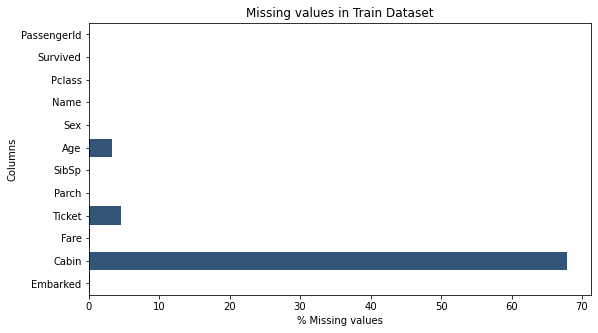

In [12]:
plt.figure(figsize = (9,5))
sns.barplot(x = null.values, y = list(null.index), color='#265484')
plt.xlabel("% Missing values")
plt.ylabel("Columns")
plt.title("Missing values in Train Dataset")

In [17]:
train.Cabin.head()

0    C12239
1      None
2      None
3      None
4      None
Name: Cabin, dtype: object

Cabin column contains almost 68% of null values. We will fill in them with "None" as data type is "Object".
Similarly we will treat Ticket column.

In [15]:
train["Cabin"] = train["Cabin"].fillna("None")
train["Ticket"] = train["Ticket"].fillna("None")

In [16]:
train.isnull().sum().sort_values(ascending=False)

Age            3292
Embarked        250
Fare            134
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin             0
dtype: int64

Let's look at Age distribution before deciding how to treat null values as Age is one of the most important attributes of survival.

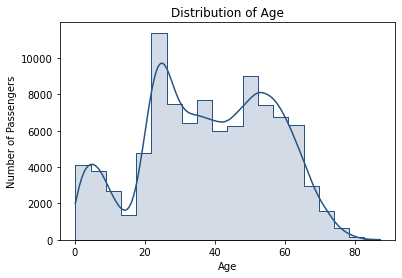

In [26]:
sns.histplot(data = train['Age'],bins=20,kde=True, color='#265484',element="step", alpha=0.2)
plt.title('Distribution of Age')
plt.ylabel('Number of Passengers')
plt.show()

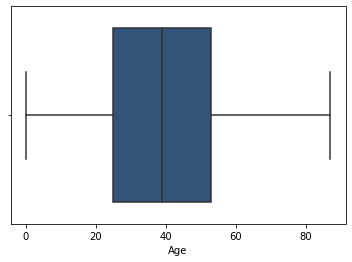

In [27]:
sns.boxplot(x = train['Age'],color='#265484')
plt.show()

Age distribution is left skewed to some extend so we will use median to fill in the missing values.

In [29]:
median_age = train["Age"].median()
train["Age"] = train["Age"].fillna(median_age)
train.isnull().sum().sort_values(ascending=False)

Embarked       250
Fare           134
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Cabin            0
dtype: int64

In [49]:
#Drop remaining null vlaues in Embarked and Fare columns as their share was insignificant
train = train.dropna()
train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
#Check duplicates in passenger names and ID
duplicates_name = train.duplicated(subset="Name", keep=False)
print(duplicates_name.value_counts())
duplicates_id = train.duplicated(subset="PassengerId", keep=False)
print(duplicates_id.value_counts())
#There are people with identical names but their IDs are unique => no duplicates

False    87240
True     12760
dtype: int64
False    100000
dtype: int64


In [57]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,39.0,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,39.0,0,0,27323,13.35,None,S


In [61]:
#Check consistency in categorical columns
print(train["Survived"].unique())
print(train["Sex"].unique())
print(train["Pclass"].unique())
print(train["Embarked"].unique())

[1 0]
['male' 'female']
[1 3 2]
['S' 'C' 'Q']
[0 2 1 4 3 5 6 9]


## Exploratory Analysis and Visualisation

## Summary